<a href="https://colab.research.google.com/github/ZahraAlijani/interactivity/blob/main/colab_shared_with_Petra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

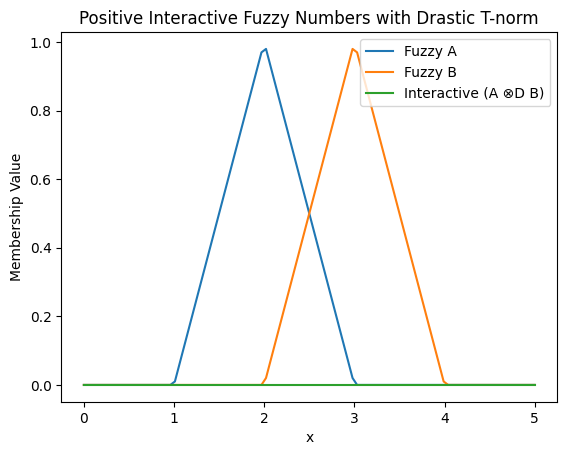

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def drastic_t_norm(a, b):
    if max(a, b) == 1:
        return min(a, b)
    else:
        return 0

# Define triangular fuzzy numbers A and B
x_values = np.linspace(0, 5, 100)
A_values = triangular(x_values, 1, 2, 3)
B_values = triangular(x_values, 2, 3, 4)

# Calculate interactive possibility distribution using drastic t-norm
interactive_values = [drastic_t_norm(a, b) for a, b in zip(A_values, B_values)]

# Plotting
plt.plot(x_values, A_values, label='Fuzzy A')
plt.plot(x_values, B_values, label='Fuzzy B')
plt.plot(x_values, interactive_values, label='Interactive (A ⊗D B)')

plt.title('Positive Interactive Fuzzy Numbers with Drastic T-norm')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()

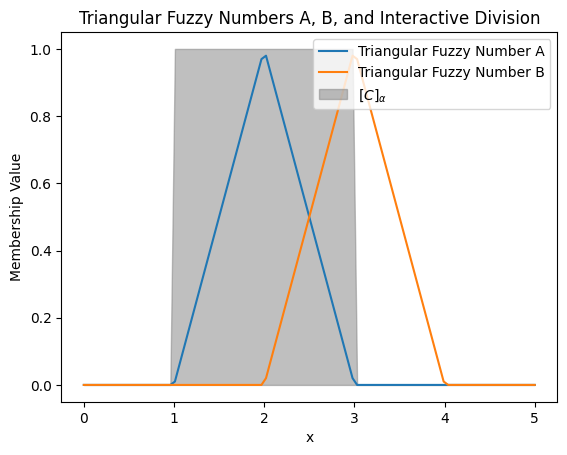

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def drastic_t_norm(a, b):
    return min(a, b) if max(a, b) == 1 else 0

def interactive_division_alpha_cuts(A_values, B_values, alpha):
    C_lower = np.zeros_like(A_values)
    C_upper = np.zeros_like(A_values)

    for i in range(len(A_values)):
        for j in range(len(B_values)):
            if B_values[j] != 0:  # Avoid division by zero
                # Calculate lower and upper bounds for C based on α-cuts formula
                C_lower[i] = min(C_lower[i], A_values[i] / B_values[j])
                C_upper[i] = max(C_upper[i], A_values[i] / B_values[j])

    # Apply the α-cut threshold
    C_lower = C_lower >= alpha
    C_upper = C_upper >= alpha

    return C_lower, C_upper

# Define triangular fuzzy numbers A and B
x_values = np.linspace(0, 5, 100)
A_values = triangular(x_values, 1, 2, 3)
B_values = triangular(x_values, 2, 3, 4)

# Set the α value for the α-cuts
alpha = 0.5

# Perform interactive division based on α-cuts with using drastic t-norm
C_lower_alpha_cuts, C_upper_alpha_cuts = interactive_division_alpha_cuts(A_values, B_values, alpha)

# Plot the fuzzy numbers and their α-cuts
plt.plot(x_values, A_values, label='Triangular Fuzzy Number A')
plt.plot(x_values, B_values, label='Triangular Fuzzy Number B')
plt.fill_between(x_values, C_lower_alpha_cuts, C_upper_alpha_cuts, color='gray', alpha=0.5, label=r'$[C]_\alpha$')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.title('Triangular Fuzzy Numbers A, B, and Interactive Division')
plt.legend()
plt.show()

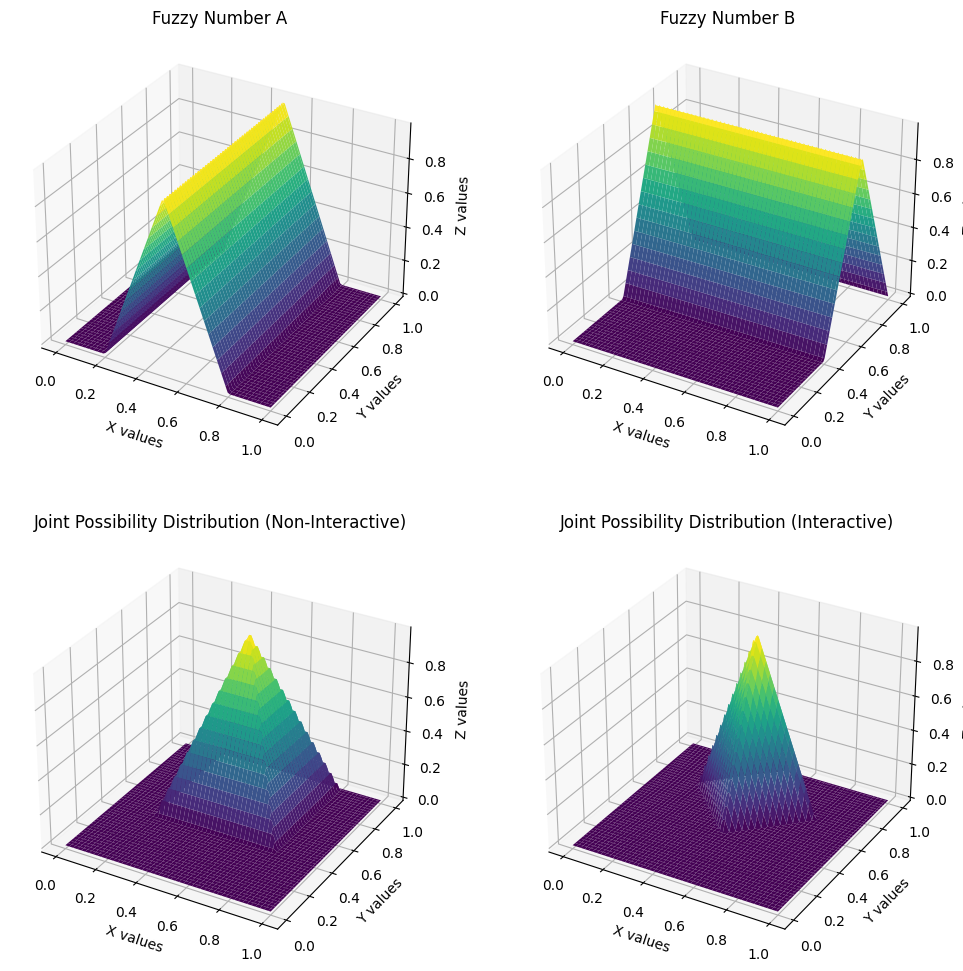

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for two positive triangular fuzzy numbers
a1, b1, c1 = 0.2, 0.5, 0.8  # Parameters for fuzzy number A
a2, b2, c2 = 0.4, 0.7, 1.0  # Parameters for fuzzy number B

# Create a range of values for x (considering both fuzzy numbers)
x = np.linspace(0, 1, 100)

# Calculate membership values for fuzzy numbers A and B
A = np.maximum(0, np.minimum((x - a1) / (b1 - a1), (c1 - x) / (c1 - b1)))  # Positive triangular fuzzy number A
B = np.maximum(0, np.minimum((x - a2) / (b2 - a2), (c2 - x) / (c2 - b2)))  # Positive triangular fuzzy number B

# Create a meshgrid for 3D plot
X, Y = np.meshgrid(x, x)
Z_A = np.maximum(0, np.minimum((X - a1) / (b1 - a1), (c1 - X) / (c1 - b1)))  # Joint possibility distribution for A
Z_B = np.maximum(0, np.minimum((Y - a2) / (b2 - a2), (c2 - Y) / (c2 - b2)))  # Joint possibility distribution for B

# Calculate joint possibility distributions for interactive and non-interactive cases
Z_non_interactive = np.minimum(Z_A, Z_B)  # Non-interactive case
#Z_interactive = np.maximum(Z_A, Z_B)      # Example: interactive case (replace with your own formula)
Z_interactive = np.maximum(0, Z_A + Z_B - 1)  # Lukasiewicz t-norm

# Plotting all in the same set of axes
fig = plt.figure(figsize=(12, 12))  # Adjust the figsize for smaller plots

# Plotting fuzzy number A
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, Z_A, cmap='viridis')
ax1.set_title('Fuzzy Number A')
ax1.set_xlabel('X values')
ax1.set_ylabel('Y values')
ax1.set_zlabel('Z values')

# Plotting fuzzy number B
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, Z_B, cmap='viridis')
ax2.set_title('Fuzzy Number B')
ax2.set_xlabel('X values')
ax2.set_ylabel('Y values')
ax2.set_zlabel('Z values')

# Plotting joint possibility distribution for non-interactive case
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, Z_non_interactive, cmap='viridis')
ax3.set_title('Joint Possibility Distribution (Non-Interactive)')
ax3.set_xlabel('X values')
ax3.set_ylabel('Y values')
ax3.set_zlabel('Z values')

# Plotting joint possibility distribution for interactive case
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, Z_interactive, cmap='viridis')
ax4.set_title('Joint Possibility Distribution (Interactive)')
ax4.set_xlabel('X values')
ax4.set_ylabel('Y values')
ax4.set_zlabel('Z values')

# Save the plots as a PDF file
plt.savefig('output_plots_triangular.pdf')

# Show the plots (optional)
plt.show()


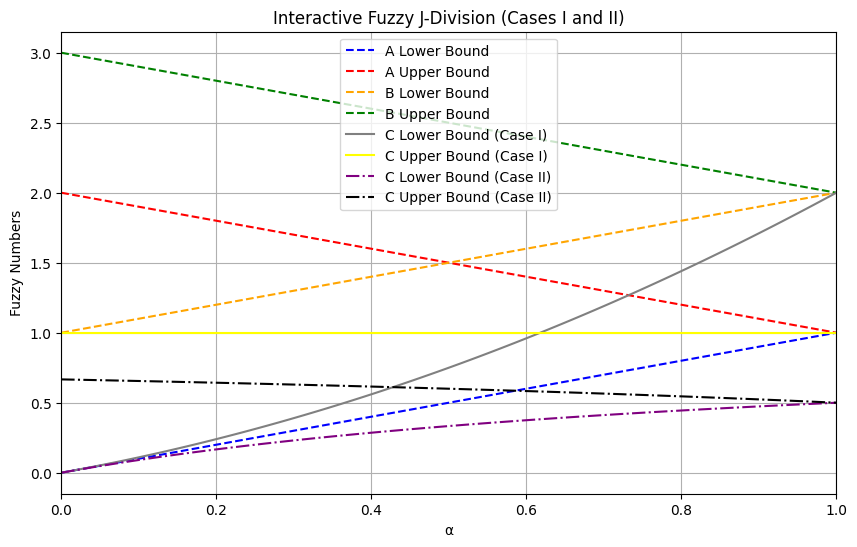

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
A_alpha = np.array([[ alpha, 2 - alpha] for alpha in alpha_values])
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case I
def interactive_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, min(x * y for x, y in zip(A, B))) for A, B in zip(A_alpha, B_alpha)])
    C_r_case1 = np.array([min(1, max(x * y for x, y in zip(A, B))) for A, B in zip(A_alpha, B_alpha)])
    return C_l_case1, C_r_case1

# Function to perform interactive fuzzy division for Case II
def interactive_division_case_II(A_alpha, B_alpha):
    C_l_case2 = np.array([max(0, min(x / y, 1)) for x, y in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case2 = np.array([max(0, min(x / y, 1)) for x, y in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case2, C_r_case2

# Perform interactive fuzzy division for Case I
C_l_case1, C_r_case1 = interactive_division_case_I(A_alpha, B_alpha)

# Perform interactive fuzzy division for Case II
C_l_case2, C_r_case2 = interactive_division_case_II(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle='--', color='red')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle='--', color='green')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='C Lower Bound (Case I)', linestyle='-', color='gray')
plt.plot(alpha_values, C_r_case1, label='C Upper Bound (Case I)', linestyle='-', color='yellow')

# Plot α-cuts for C in Case II
plt.plot(alpha_values, C_l_case2, label='C Lower Bound (Case II)', linestyle='-.', color='purple')
plt.plot(alpha_values, C_r_case2, label='C Upper Bound (Case II)', linestyle='-.', color='black')

plt.title('Interactive Fuzzy J-Division (Cases I and II)')
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('interactive_fuzzy_division.pdf', format='pdf', bbox_inches='tight')
plt.show()


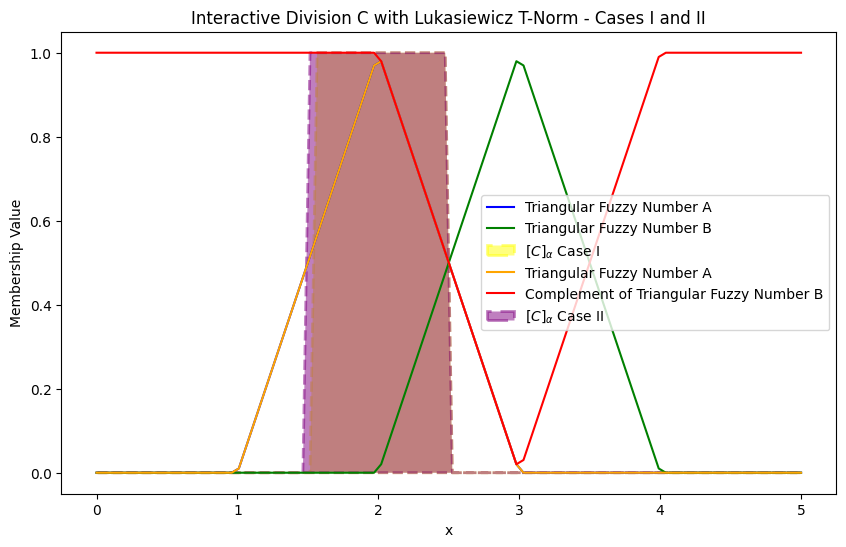

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def lukasiewicz_t_norm(a, b):
    return max(0, a + b - 1)

def interactive_division_alpha_cuts_caseI(A_values, B_values, alpha):
    C_lower = np.zeros_like(A_values)
    C_upper = np.zeros_like(A_values)

    for i in range(len(A_values)):
        for j in range(len(B_values)):
            # Calculate lower and upper bounds for C based on α-cuts formula for Case I
            C_lower[i] = max(C_lower[i], lukasiewicz_t_norm(B_values[j], A_values[i]))
            C_upper[i] = min(C_upper[i], lukasiewicz_t_norm(B_values[j], A_values[i]))

    # Apply the α-cut threshold
    C_lower = C_lower >= alpha
    C_upper = C_upper >= alpha

    return C_lower, C_upper

def interactive_division_alpha_cuts_caseII(A_values, B_values, alpha):
    C_lower = np.zeros_like(A_values)
    C_upper = np.zeros_like(A_values)

    for i in range(len(A_values)):
        for j in range(len(B_values)):
            # Calculate lower and upper bounds for C based on α-cuts formula for Case II
            C_lower[i] = max(C_lower[i], lukasiewicz_t_norm(A_values[i], 1 - B_values[j]))
            C_upper[i] = min(C_upper[i], lukasiewicz_t_norm(A_values[i], 1 - B_values[j]))

    # Apply the α-cut threshold
    C_lower = C_lower >= alpha
    C_upper = C_upper >= alpha

    return C_lower, C_upper

# Define triangular fuzzy numbers A and B
x_values = np.linspace(0, 5, 100)
A_values = triangular(x_values, 1, 2, 3)
B_values = triangular(x_values, 2, 3, 4)

# Set the α value for the α-cuts
alpha = 0.5

# Perform interactive division based on α-cuts using Lukasiewicz T-norm for Case I and Case II
C_lower_alpha_cuts_caseI, C_upper_alpha_cuts_caseI = interactive_division_alpha_cuts_caseI(A_values, B_values, alpha)
C_lower_alpha_cuts_caseII, C_upper_alpha_cuts_caseII = interactive_division_alpha_cuts_caseII(A_values, B_values, alpha)

# Plot both cases in one figure
plt.figure(figsize=(10, 6))

# Plot Case I
plt.plot(x_values, A_values, label='Triangular Fuzzy Number A', color='blue')
plt.plot(x_values, B_values, label='Triangular Fuzzy Number B', color='green')
plt.fill_between(x_values, C_lower_alpha_cuts_caseI, C_upper_alpha_cuts_caseI, color='yellow', alpha=0.5, label=r'$[C]_\alpha$ Case I', linestyle='--', linewidth=2)

# Plot Case II
plt.plot(x_values, A_values, label='Triangular Fuzzy Number A', color='orange')
plt.plot(x_values, 1 - B_values, label='Complement of Triangular Fuzzy Number B', color='red')
plt.fill_between(x_values, C_lower_alpha_cuts_caseII, C_upper_alpha_cuts_caseII, color='purple', alpha=0.5, label=r'$[C]_\alpha$ Case II', linestyle='--', linewidth=2)

plt.xlabel('x')
plt.ylabel('Membership Value')
plt.title('Interactive Division C with Lukasiewicz T-Norm - Cases I and II')
plt.legend()
plt.show()


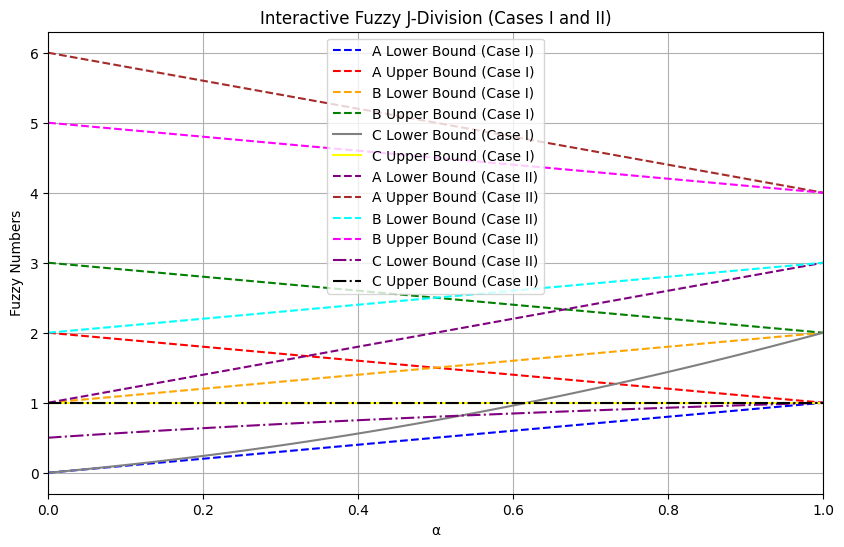

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B (Case I: Triangular Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)

# Case I: Triangular Fuzzy Numbers
A_alpha_case1_triangular = np.array([[alpha, 2 - alpha] for alpha in alpha_values])
B_alpha_case1_triangular = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case I
def interactive_division_case_I_triangular(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, min(x * y for x, y in zip(A, B))) for A, B in zip(A_alpha, B_alpha)])
    C_r_case1 = np.array([min(1, max(x * y for x, y in zip(A, B))) for A, B in zip(A_alpha, B_alpha)])
    return C_l_case1, C_r_case1

# Perform interactive fuzzy division for Case I with Triangular Fuzzy Numbers
C_l_case1_triangular, C_r_case1_triangular = interactive_division_case_I_triangular(A_alpha_case1_triangular, B_alpha_case1_triangular)

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
A_alpha_case2_trapezoidal = np.array([[2 * alpha + 1, 6 - 2 * alpha] for alpha in alpha_values])
B_alpha_case2_trapezoidal = np.array([[alpha + 2, 5 - alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case II
def interactive_division_case_II_trapezoidal(A_alpha, B_alpha):
    C_l_case2 = np.array([max(0, min(x / y, 1)) for x, y in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case2 = np.array([max(0, min(x / y, 1)) for x, y in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case2, C_r_case2

# Perform interactive fuzzy division for Case II with Trapezoidal Fuzzy Numbers
C_l_case2_trapezoidal, C_r_case2_trapezoidal = interactive_division_case_II_trapezoidal(A_alpha_case2_trapezoidal, B_alpha_case2_trapezoidal)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B (Case I: Triangular Fuzzy Numbers)
plt.plot(alpha_values, A_alpha_case1_triangular[:, 0], label='A Lower Bound (Case I)', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha_case1_triangular[:, 1], label='A Upper Bound (Case I)', linestyle='--', color='red')
plt.plot(alpha_values, B_alpha_case1_triangular[:, 0], label='B Lower Bound (Case I)', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha_case1_triangular[:, 1], label='B Upper Bound (Case I)', linestyle='--', color='green')

# Plot α-cuts for C in Case I with Triangular Fuzzy Numbers
plt.plot(alpha_values, C_l_case1_triangular, label='C Lower Bound (Case I)', linestyle='-', color='gray')
plt.plot(alpha_values, C_r_case1_triangular, label='C Upper Bound (Case I)', linestyle='-', color='yellow')

# Plot α-cuts for A and B (Case II: Trapezoidal Fuzzy Numbers)
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 0], label='A Lower Bound (Case II)', linestyle='--', color='purple')
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 1], label='A Upper Bound (Case II)', linestyle='--', color='brown')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 0], label='B Lower Bound (Case II)', linestyle='--', color='cyan')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 1], label='B Upper Bound (Case II)', linestyle='--', color='magenta')

# Plot α-cuts for C in Case II with Trapezoidal Fuzzy Numbers
plt.plot(alpha_values, C_l_case2_trapezoidal, label='C Lower Bound (Case II)', linestyle='-.', color='purple')
plt.plot(alpha_values, C_r_case2_trapezoidal, label='C Upper Bound (Case II)', linestyle='-.', color='black')

plt.title('Interactive Fuzzy J-Division (Cases I and II)')
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('interactive_fuzzy_division_cases_I_and_II.pdf', format='pdf', bbox_inches='tight')
plt.show()


possibility distribution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.26767676767676774, 0.28787878787878807, 0.3080808080808082, 0.3282828282828283, 0.3484848484848486, 0.36868686868686873, 0.38888888888888884, 0.40909090909090917, 0.4292929292929295, 0.4494949494949496, 0.4696969696969697, 0.48989898989899006, 0.5101010101010104, 0.5303030303030303, 0.5505050505050506, 0.5707070707070709, 0.5909090909090908, 0.6111111111111112, 0.6313131313131315, 0.6515151515151514, 0.6717171717171717, 0.691919191919192, 0.7121212121212119, 0.7323232323232327, 0.7474747474747474, 0.7272727272727271, 0.7070707070707067, 0.6868686868686869, 0.6666666666666665, 0.6464646464646462, 0.6262626262626263, 0.606060606060606, 0.5858585858585856, 0.5656565656565657, 0.5454545454545454, 0.5252525252525251, 0.5050505050505052, 0.4848484848484844, 0.46464646464646453, 0.44444444444444464, 0.42424242424242387, 0.404040404040404, 0.38383838383

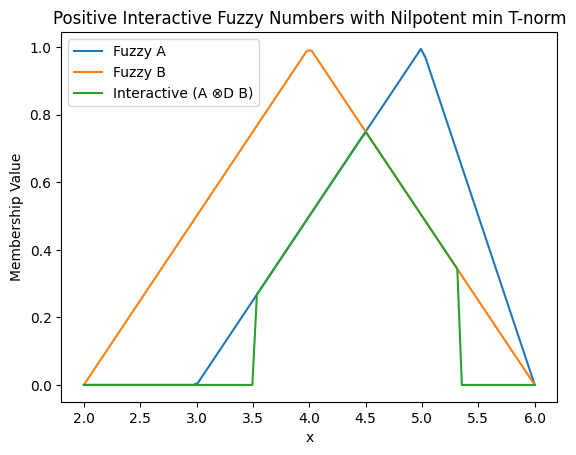

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def drastic_t_norm(a, b):
    if max(a, b) == 1:
        return min(a, b)
    else:
        return 0

def nilpotent_min_t_norm(a, b):
    if a + b > 1:
        return min(a, b)
    else:
        return 0

def Lukasiewicz_t_norm(a, b):
    return np.maximum(0, a + b - 1)

# Define triangular fuzzy numbers A and B
x_values = np.linspace(2, 6, 100)
A_values = triangular(x_values, 3, 5, 6)
B_values = triangular(x_values, 2, 4, 6)

# Calculate interactive possibility distribution using drastic t-norm
#interactive_values = [drastic_t_norm(a, b) for a, b in zip(A_values, B_values)]

# Calculate interactive possibility distribution using Nilpotent minimum t-norm
interactive_values = [nilpotent_min_t_norm(a, b) for a, b in zip(A_values, B_values)]

# Calculate interactive possibility distribution using Lukasiewicz t-norm
#interactive_values = [Lukasiewicz_t_norm(a, b) for a, b in zip(A_values, B_values)]

print('possibility distribution:', interactive_values)
#print(x_values)

# Plotting
plt.plot(x_values, A_values, label='Fuzzy A')
plt.plot(x_values, B_values, label='Fuzzy B')
plt.plot(x_values, interactive_values, label='Interactive (A ⊗D B)')

#plt.title('Positive Interactive Fuzzy Numbers with Drastic T-norm')
plt.title('Positive Interactive Fuzzy Numbers with Nilpotent min T-norm')
#plt.title('Positive Interactive Fuzzy Numbers with Lukasiewicz T-norm')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()

<ipython-input-6-1b7ea2b54c62>:11: RuntimeWarning: divide by zero encountered in scalar divide
  C_l_case1 = np.array([max(0, min(A_l / B_l + B_l / A_l, 1)) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])


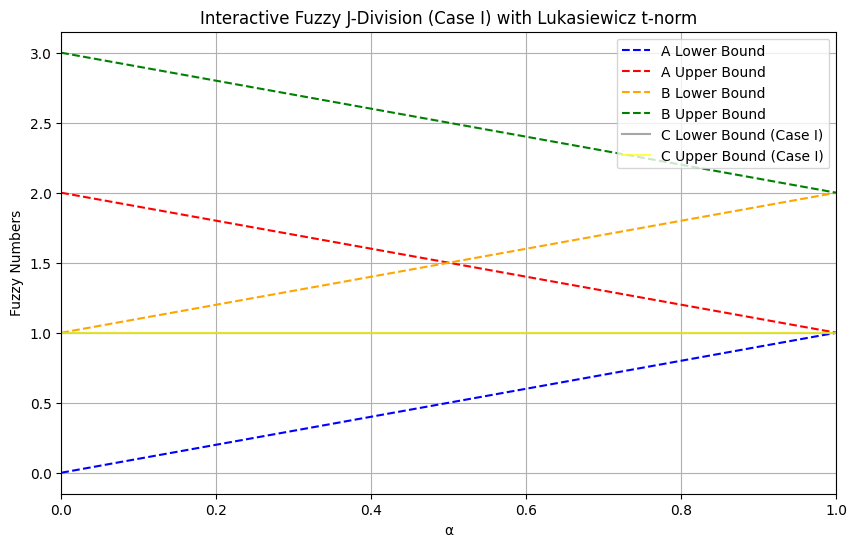

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
A_alpha = np.array([[alpha, 2 - alpha] for alpha in alpha_values])
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case I with Lukasiewicz t-norm
def interactive_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, min(A_l / B_l + B_l / A_l, 1)) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case1 = np.array([min(A_r / B_r + B_r / A_r, 1) for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case1, C_r_case1

# Perform interactive fuzzy division for Case I
C_l_case1, C_r_case1 = interactive_division_case_I(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle='--', color='red')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle='--', color='green')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='C Lower Bound (Case I)', linestyle='-', color='gray', alpha=0.7)
plt.plot(alpha_values, C_r_case1, label='C Upper Bound (Case I)', linestyle='-', color='yellow', alpha=0.7)

plt.title('Interactive Fuzzy J-Division (Case I) with Lukasiewicz t-norm')
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('interactive_fuzzy_division_lukasiewicz_case_I.pdf', format='pdf', bbox_inches='tight')
plt.show()


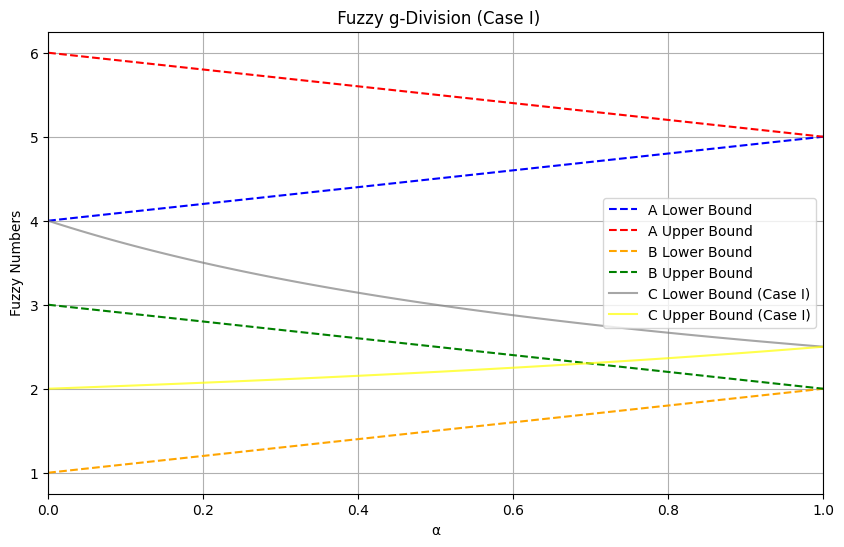

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
B_alpha = np.array([[1+ alpha,  3-alpha] for alpha in alpha_values])
A_alpha = np.array([[4 + alpha, 6-alpha] for alpha in alpha_values])

# Function to perform g fuzzy division for Case I
def g_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, A_l / B_l) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case1 = np.array([A_r / B_r for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case1, C_r_case1

# Perform  fuzzy g-division for Case I
C_l_case1, C_r_case1 = g_division_case_I(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle='--', color='red')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle='--', color='green')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='C Lower Bound (Case I)', linestyle='-', color='gray', alpha=0.7)
plt.plot(alpha_values, C_r_case1, label='C Upper Bound (Case I)', linestyle='-', color='yellow', alpha=0.7)

plt.title(' Fuzzy g-Division (Case I)' )
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('g_fuzzy_division_case_I.pdf', format='pdf', bbox_inches='tight')
plt.show()


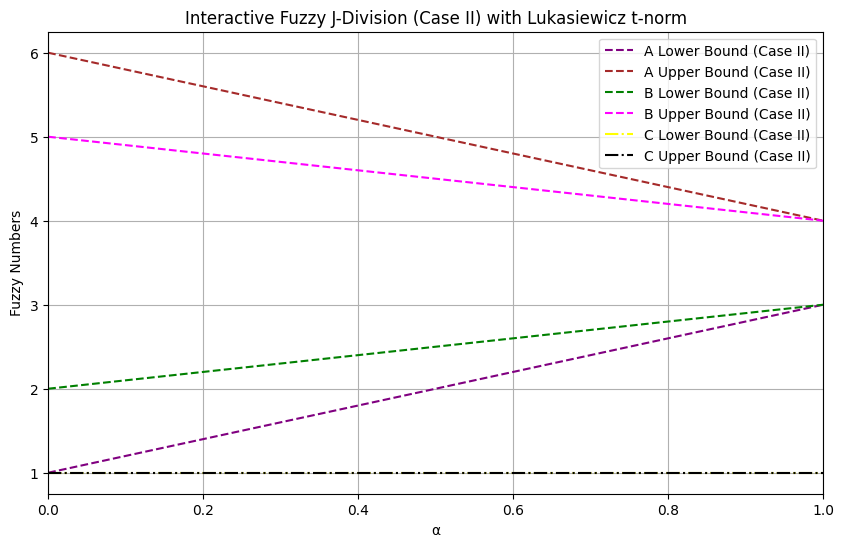

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
A_alpha_case2_trapezoidal = np.array([[2 * alpha + 1, 6 - 2 * alpha] for alpha in alpha_values])
B_alpha_case2_trapezoidal = np.array([[alpha + 2, 5 - alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case II with Lukasiewicz t-norm
def interactive_division_case_II(A_alpha, B_alpha):
    C_l_case2 = np.array([max(0, min(A_r / B_r + B_r / A_r, 1)) for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    C_r_case2 = np.array([min(A_l / B_l + B_l / A_l, 1) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    return C_l_case2, C_r_case2

# Perform interactive fuzzy division for Case II with Lukasiewicz t-norm
C_l_case2, C_r_case2 = interactive_division_case_II(A_alpha_case2_trapezoidal, B_alpha_case2_trapezoidal)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B (Case II)
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 0], label='A Lower Bound (Case II)', linestyle='--', color='purple')
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 1], label='A Upper Bound (Case II)', linestyle='--', color='brown')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 0], label='B Lower Bound (Case II)', linestyle='--', color='green')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 1], label='B Upper Bound (Case II)', linestyle='--', color='magenta')

# Plot α-cuts for C in Case II
plt.plot(alpha_values, C_l_case2, label='C Lower Bound (Case II)', linestyle='-.', color='yellow')
plt.plot(alpha_values, C_r_case2, label='C Upper Bound (Case II)', linestyle='-.', color='black')

plt.title('Interactive Fuzzy J-Division (Case II) with Lukasiewicz t-norm')
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('interactive_fuzzy_division_case_II_with_lukasiewicz_tnorm.pdf', format='pdf', bbox_inches='tight')
plt.show()


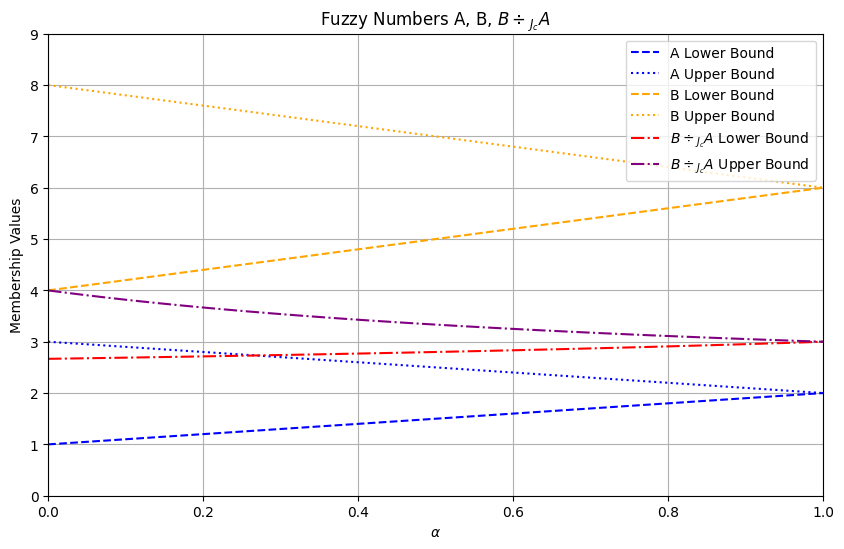

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (1, 2, 3)
B = (4, 6, 8)

# Parameters
q = 2
r = 2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 1 + alpha_levels
a2_alpha = 3 - alpha_levels
b1_alpha = 4 + 2 * alpha_levels
b2_alpha = 8 - 2 * alpha_levels

# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')

# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='red')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.ylim(0, 9)  # Adjust y-axis limits as needed
# Save the plot as a vectorized PDF
plt.savefig(' J-division.pdf', format='pdf', bbox_inches='tight')
plt.show()


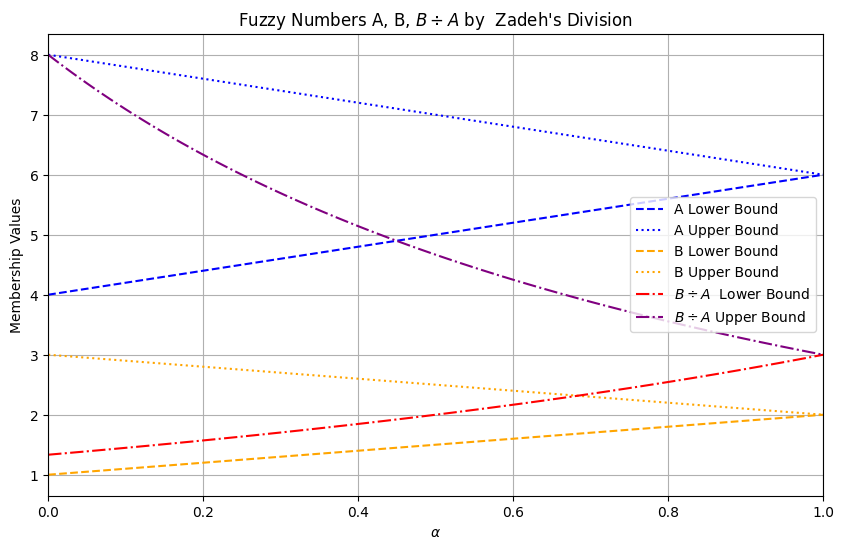

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])
A_alpha = np.array([[2 * alpha + 4, 8 - 2 * alpha] for alpha in alpha_values])

# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for fuzzy numbers A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle=':', color='blue')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle=':', color='orange')

# Plot fuzzy division C_l and C_u
plt.plot(alpha_values, C_l_alpha, label='$B \div A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div A$ Upper Bound', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title("Fuzzy Numbers A, B, $B \div A$ by  Zadeh's Division")
plt.legend()
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.grid(True)
# Save the plot as a vectorized PDF
plt.savefig('Fuzzy Numbers A, B, and division C by Zadeh Division.pdf', format='pdf', bbox_inches='tight')
plt.show()


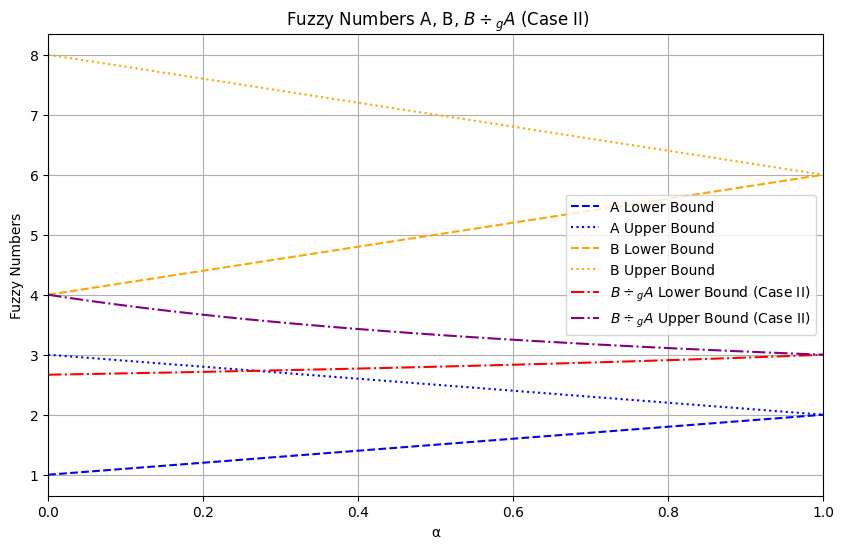

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
A_alpha_case2_trapezoidal = np.array([[ alpha + 1,3 -  alpha] for alpha in alpha_values])
B_alpha_case2_trapezoidal = np.array([[2*alpha + 4,8 - 2*alpha] for alpha in alpha_values])

# Function to perform interactive fuzzy division for Case II without Lukasiewicz t-norm
def g_division_case_II(A_alpha, B_alpha):
    C_l_case2 = np.array([B_r / A_r for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    C_r_case2 = np.array([B_l / A_l for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    return C_l_case2, C_r_case2

# Perform g fuzzy division for Case II
C_l_case2, C_r_case2 = g_division_case_II(A_alpha_case2_trapezoidal, B_alpha_case2_trapezoidal)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B (Case II)
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 0], label='A Lower Bound ',  linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha_case2_trapezoidal[:, 1], label='A Upper Bound ',  linestyle=':', color='blue')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 0], label='B Lower Bound ', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha_case2_trapezoidal[:, 1], label='B Upper Bound ',  linestyle=':', color='orange')

# Plot α-cuts for C in Case II
plt.plot(alpha_values, C_l_case2, label='$B\div_{g} A$ Lower Bound (Case II)', linestyle='-.', color='red')
plt.plot(alpha_values, C_r_case2, label='$B\div_{g} A$ Upper Bound (Case II)', linestyle='-.', color='purple')

plt.title(' Fuzzy Numbers A, B, $B\div_{g} A$ (Case II) ')
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('g_fuzzy_division_case_II.pdf', format='pdf', bbox_inches='tight')
plt.show()

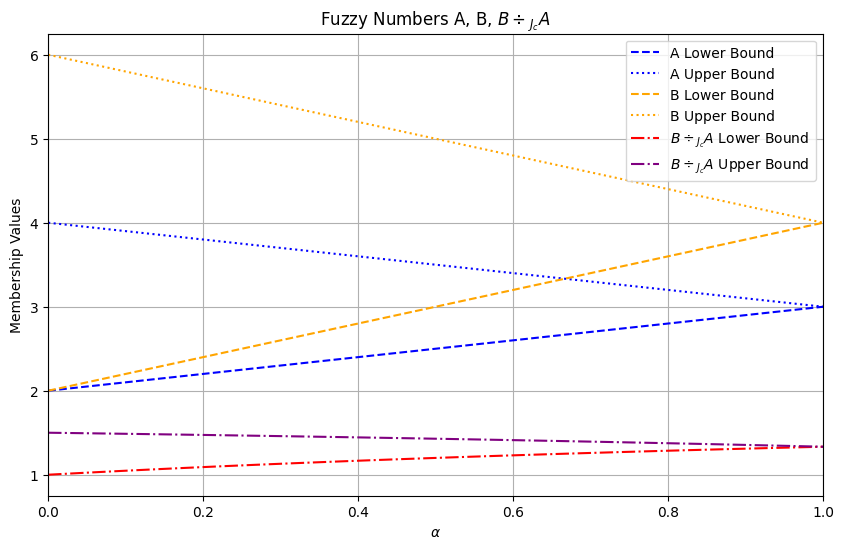

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (2, 3, 4)
B = (2, 4, 6)

# Parameters
q = 2
r = -2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 2 + alpha_levels
a2_alpha = 4 - alpha_levels
b1_alpha = 2 + 2 * alpha_levels
b2_alpha = 6 - 2 * alpha_levels

# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a1_alpha
B_div_J_A_upper_alpha = q + r / a2_alpha

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')

# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='red')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
#plt.ylim(0, 9)  # Adjust y-axis limits as needed
# Save the plot as a vectorized PDF
plt.savefig('ex2J-division.pdf', format='pdf', bbox_inches='tight')
plt.show()

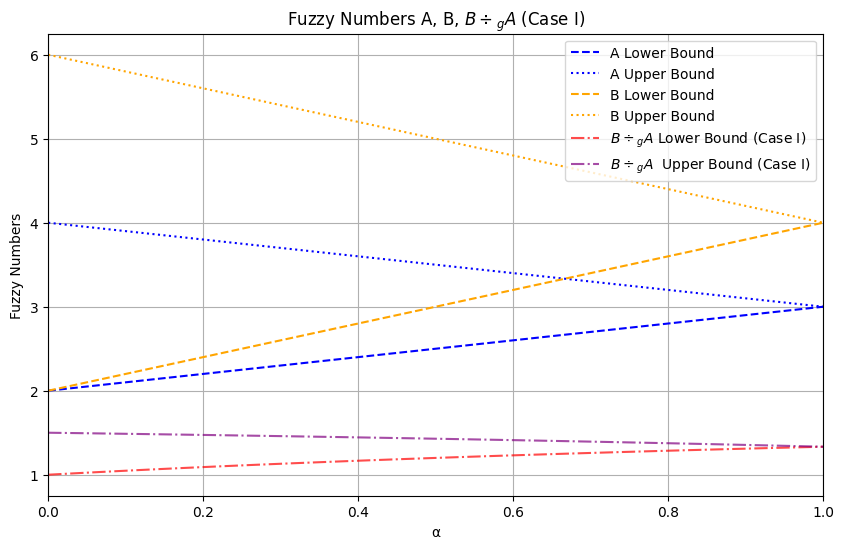

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
A_alpha = np.array([[2+ alpha,  4-alpha] for alpha in alpha_values])
B_alpha = np.array([[2*alpha+2, 6-2*alpha] for alpha in alpha_values])

# Function to perform g fuzzy division for Case I
def g_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, B_l / A_l) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case1 = np.array([B_r / A_r for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case1, C_r_case1

# Perform  fuzzy g-division for Case I
C_l_case1, C_r_case1 = g_division_case_I(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle=':', color='blue')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle=':', color='orange')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='$B \div_{g} A$ Lower Bound (Case I)', linestyle='-.', color='red', alpha=0.7)
plt.plot(alpha_values, C_r_case1, label='$B \div_{g} A$  Upper Bound (Case I)', linestyle='-.', color='purple', alpha=0.7)

plt.title('Fuzzy Numbers A, B, $B\div_{g} A$ (Case I)' )
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('g_fuzzy_division_case_I.pdf', format='pdf', bbox_inches='tight')
plt.show()

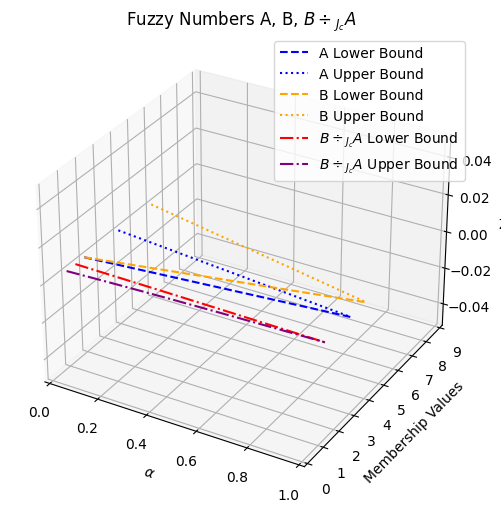

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (2, 3, 4)
B = (2, 4, 6)

# Parameters
q = 2
r = -2, #-q.a1<r<0

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 2 + alpha_levels
a2_alpha = 4 - alpha_levels
b1_alpha = 2 + 2 * alpha_levels
b2_alpha = 6 - 2 * alpha_levels

# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot A
ax.plot(alpha_levels, a1_alpha, np.zeros_like(alpha_levels), label='A Lower Bound', linestyle='--', color='blue')
ax.plot(alpha_levels, a2_alpha, np.zeros_like(alpha_levels), label='A Upper Bound', linestyle=':', color='blue')

# Plot B
ax.plot(alpha_levels, b1_alpha, np.zeros_like(alpha_levels), label='B Lower Bound', linestyle='--', color='orange')
ax.plot(alpha_levels, b2_alpha, np.zeros_like(alpha_levels), label='B Upper Bound', linestyle=':', color='orange')

# Plot B/A by J-division
ax.plot(alpha_levels, B_div_J_A_lower_alpha, np.zeros_like(alpha_levels), label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='red')
ax.plot(alpha_levels, B_div_J_A_upper_alpha, np.zeros_like(alpha_levels), label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Membership Values')
ax.set_zlabel('Z')
ax.set_title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
ax.legend()
ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim(0, 9)

# Rotate the plot
plt.show()


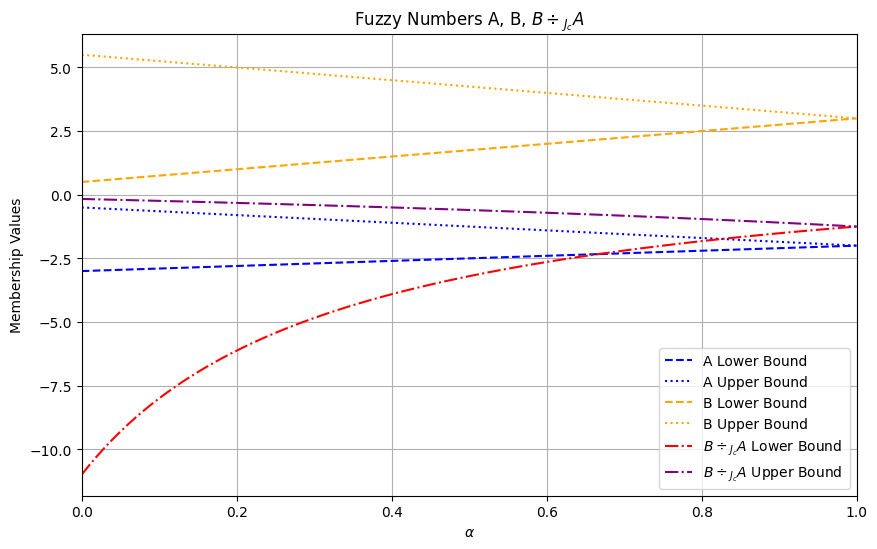

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (-3,-2, -1/2)
B = (1/2, 6/2, 11/2)

# Parameters
q = 2
r = 13/2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)
# Compute the alpha-cuts of A and B
a1_alpha = -3 + alpha_levels
a2_alpha = -(1/2) - (3/2)* alpha_levels
b1_alpha = 1/2 + (5/2) * alpha_levels
b2_alpha =11/2 - (5/2) * alpha_levels
# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha

#print(a1_alpha, a2_alpha)
#print(alpha_levels, B_div_J_A_lower_alpha, B_div_J_A_upper_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')

# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='red')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
#plt.ylim(0, 9)  # Adjust y-axis limits as needed
# Save the plot as a vectorized PDF
plt.savefig('ex2J-division.pdf', format='pdf', bbox_inches='tight')
plt.show()

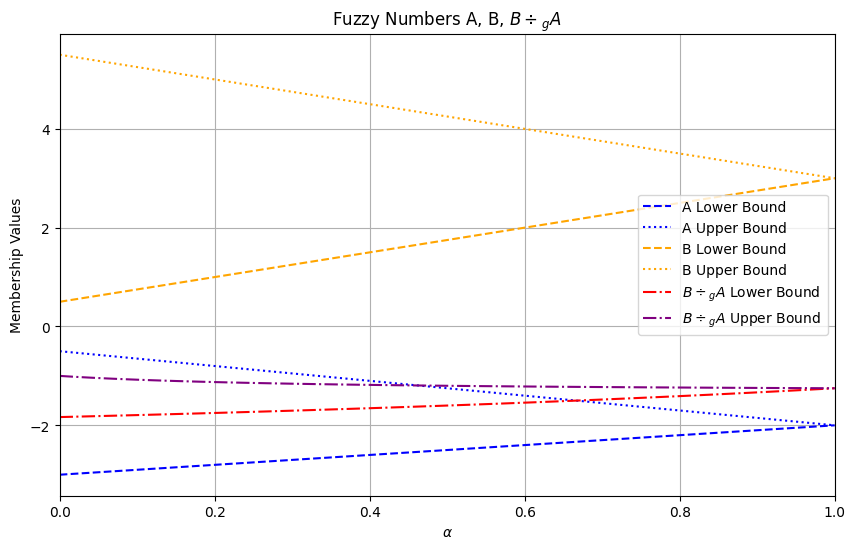

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (-3,-2, -1/2)
B = (1/2, 6/2, 11/2)

# Parameters
q = 2
r = 13/2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)
# Compute the alpha-cuts of A and B
a1_alpha = -3 + alpha_levels
a2_alpha = -(1/2) - (3/2)* alpha_levels
b1_alpha = 1/2 + (5/2) * alpha_levels
b2_alpha =11/2 - (5/2) * alpha_levels
# Compute upper and lower bounds of B_div_g_A_alpha
B_div_g_A_lower_alpha = (q*(a2_alpha )+ r) / a1_alpha
B_div_g_A_upper_alpha =(q*(a1_alpha )+ r) / a2_alpha


# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')

# Plot B/A by J-division
plt.plot(alpha_levels, B_div_g_A_lower_alpha, label='$B \div_{g} A$ Lower Bound ', linestyle='-.', color='red')
plt.plot(alpha_levels, B_div_g_A_upper_alpha, label='$B \div_{g} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{g} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
#plt.ylim(0, 9)  # Adjust y-axis limits as needed
# Save the plot as a vectorized PDF
plt.savefig('ex2g-division.pdf', format='pdf', bbox_inches='tight')
plt.show()

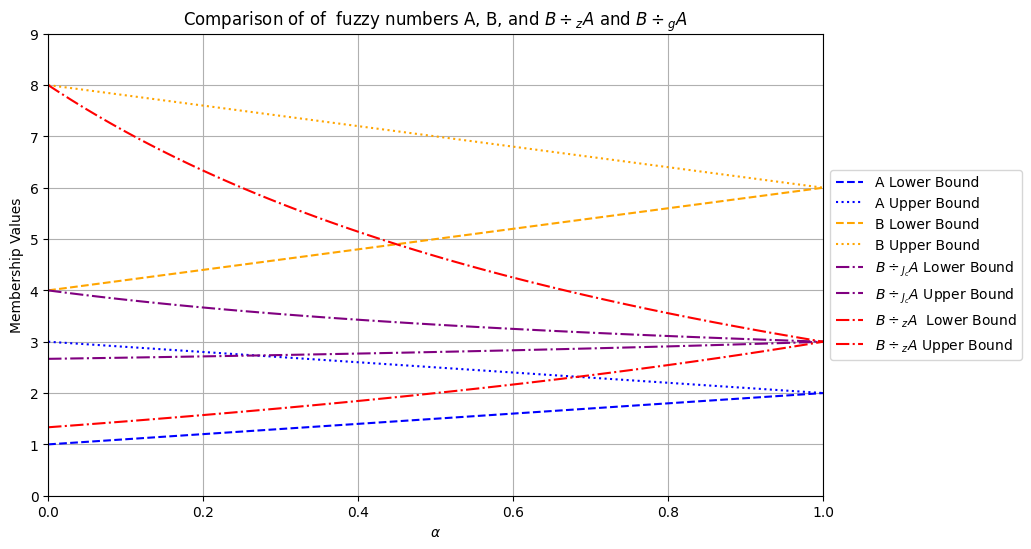

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (1, 2, 3)
B = (4, 6, 8)

# Parameters
q = 2
r = 2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 1 + alpha_levels
a2_alpha = 3 - alpha_levels
b1_alpha = 4 + 2 * alpha_levels
b2_alpha = 8 - 2 * alpha_levels

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])
A_alpha = np.array([[2 * alpha + 4, 8 - 2 * alpha] for alpha in alpha_values])

# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)
# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha
# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')
# Plotting



# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='purple')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.ylim(0, 9)  # Adjust y-axis limits as needed

plt.plot(alpha_values, C_l_alpha, label='$B \div_z A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div_z A$ Upper Bound', linestyle='-.', color='red')


plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title("Comparison of of  fuzzy numbers A, B, and $B \div_z A$ and $B\div_{g} A$ ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.grid(True)
# Save the plot as a vectorized PDF
plt.savefig('Fuzzy Numbers A, B, and $B \div A$ by Zadeh Division.pdf', format='pdf', bbox_inches='tight')
plt.show()



<Figure size 1000x600 with 0 Axes>

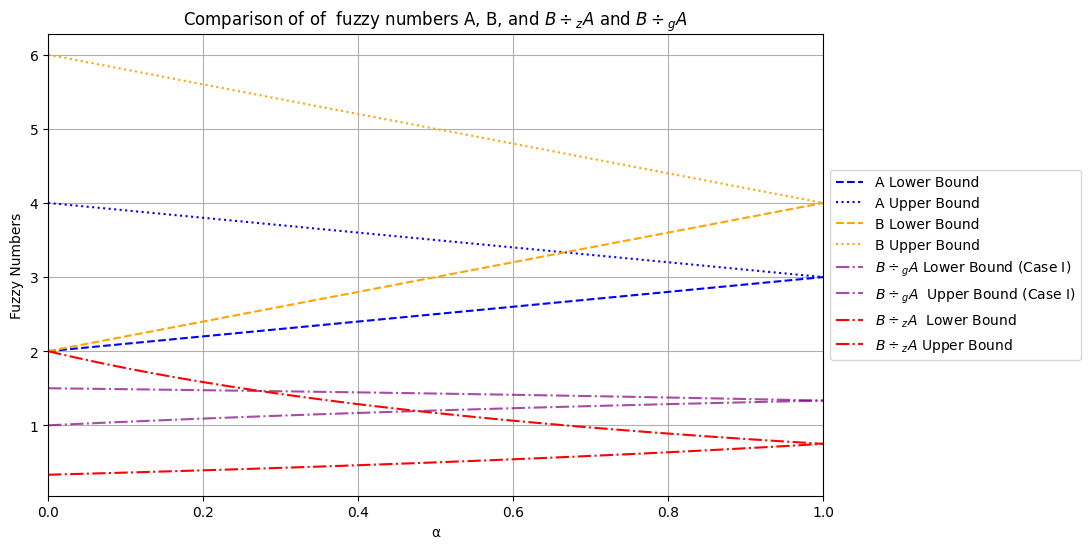

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
A_alpha = np.array([[2+ alpha,  4-alpha] for alpha in alpha_values])
B_alpha = np.array([[2*alpha+2, 6-2*alpha] for alpha in alpha_values])

# Function to perform g fuzzy division for Case I
def g_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, B_l / A_l) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case1 = np.array([B_r / A_r for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case1, C_r_case1
    # Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Perform  fuzzy g-division for Case I
C_l_case1, C_r_case1 = g_division_case_I(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle=':', color='blue')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle=':', color='orange')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='$B \div_{g} A$ Lower Bound (Case I)', linestyle='-.', color='purple', alpha=0.7)
plt.plot(alpha_values, C_r_case1, label='$B \div_{g} A$  Upper Bound (Case I)', linestyle='-.', color='purple', alpha=0.7)

plt.plot(alpha_values, C_l_alpha, label='$B \div_z A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div_z A$ Upper Bound', linestyle='-.', color='red')

plt.title("Comparison of of  fuzzy numbers A, B, and $B \div_z A$ and $B\div_{g} A$ " )
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('g_fuzzy_division_case_I.pdf', format='pdf', bbox_inches='tight')
plt.show()

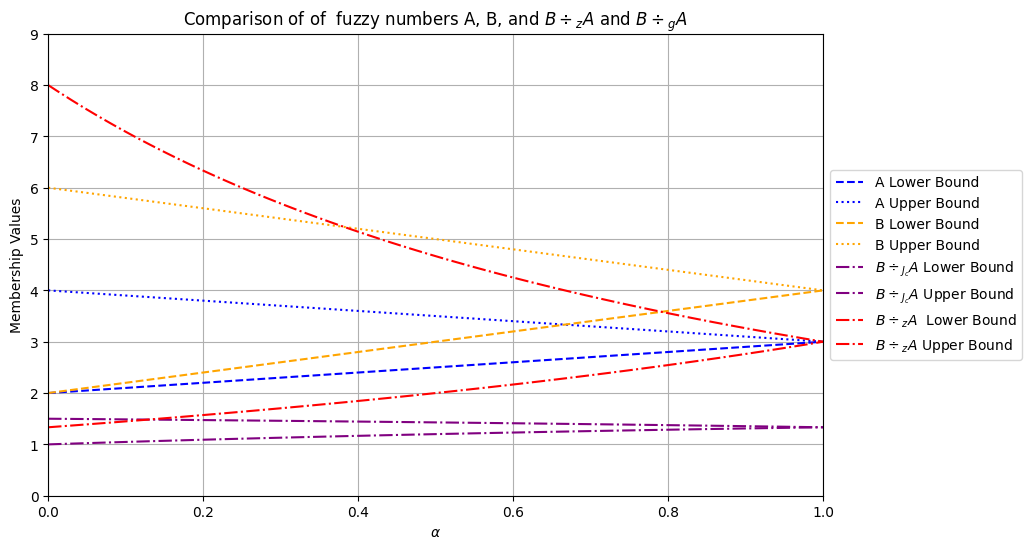

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
A = (2, 3, 4)
B = (2, 4, 6)

# Parameters
q = 2
r = -2, #-q.a1<r<0

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 2 + alpha_levels
a2_alpha = 4 - alpha_levels
b1_alpha = 2 + 2 * alpha_levels
b2_alpha = 6 - 2 * alpha_levels

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])
A_alpha = np.array([[2 * alpha + 4, 8 - 2 * alpha] for alpha in alpha_values])

# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)
# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha
# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')
# Plotting



# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='purple')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.ylim(0, 9)  # Adjust y-axis limits as needed

plt.plot(alpha_values, C_l_alpha, label='$B \div_z A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div_z A$ Upper Bound', linestyle='-.', color='red')


plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title("Comparison of of  fuzzy numbers A, B, and $B \div_z A$ and $B\div_{g} A$ ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.grid(True)
# Save the plot as a vectorized PDF
plt.savefig('Fuzzy Numbers A, B, and $B \div A$ by Zadeh Division.pdf', format='pdf', bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

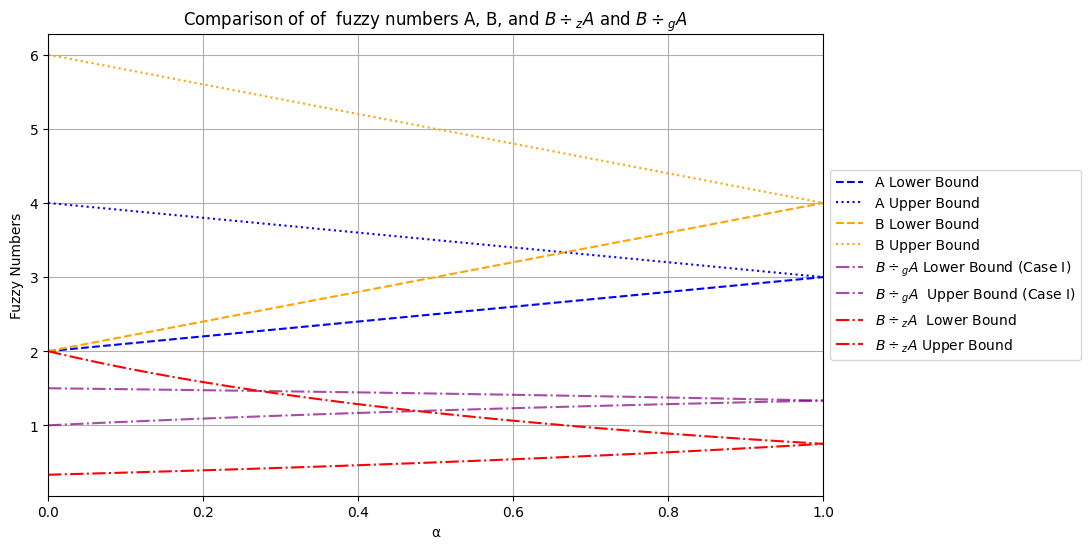

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define α-cuts for fuzzy numbers A and B
alpha_values = np.linspace(0, 1, 100)
A_alpha = np.array([[2+ alpha,  4-alpha] for alpha in alpha_values])
B_alpha = np.array([[2*alpha+2, 6-2*alpha] for alpha in alpha_values])

# Function to perform g fuzzy division for Case I
def g_division_case_I(A_alpha, B_alpha):
    C_l_case1 = np.array([max(0, B_l / A_l) for A_l, B_l in zip(A_alpha[:, 0], B_alpha[:, 0])])
    C_r_case1 = np.array([B_r / A_r for A_r, B_r in zip(A_alpha[:, 1], B_alpha[:, 1])])
    return C_l_case1, C_r_case1
    # Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Perform  fuzzy g-division for Case I
C_l_case1, C_r_case1 = g_division_case_I(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot α-cuts for A and B
plt.plot(alpha_values, A_alpha[:, 0], label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_values, A_alpha[:, 1], label='A Upper Bound', linestyle=':', color='blue')
plt.plot(alpha_values, B_alpha[:, 0], label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_values, B_alpha[:, 1], label='B Upper Bound', linestyle=':', color='orange')

# Plot α-cuts for C in Case I
plt.plot(alpha_values, C_l_case1, label='$B \div_{g} A$ Lower Bound (Case I)', linestyle='-.', color='purple', alpha=0.7)
plt.plot(alpha_values, C_r_case1, label='$B \div_{g} A$  Upper Bound (Case I)', linestyle='-.', color='purple', alpha=0.7)

plt.plot(alpha_values, C_l_alpha, label='$B \div_z A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div_z A$ Upper Bound', linestyle='-.', color='red')

plt.title("Comparison of of  fuzzy numbers A, B, and $B \div_z A$ and $B\div_{g} A$ " )
plt.xlabel('α')
plt.ylabel('Fuzzy Numbers')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limit to [0, 1]

# Save the plot as a vectorized PDF
plt.savefig('g_fuzzy_division_case_I.pdf', format='pdf', bbox_inches='tight')
plt.show()

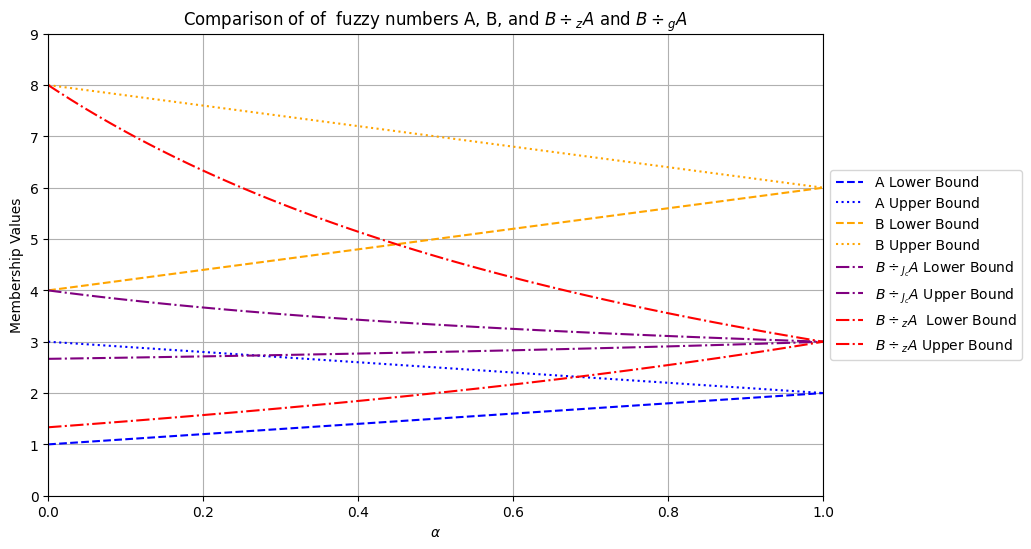

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Triangular fuzzy numbers A and B (lower bound, modal value, upper bound)
A = (1, 2, 3)
B = (4, 6, 8)

# Parameters
q = 2
r = 2

# Compute alpha levels
alpha_levels = np.linspace(0, 1, 100)

# Compute the alpha-cuts of A and B
a1_alpha = 1 + alpha_levels
a2_alpha = 3 - alpha_levels
b1_alpha = 4 + 2 * alpha_levels
b2_alpha = 8 - 2 * alpha_levels

# Define α-cuts for fuzzy numbers A and B (Case II: Trapezoidal Fuzzy Numbers)
alpha_values = np.linspace(0, 1, 100)
B_alpha = np.array([[1 + alpha, 3 - alpha] for alpha in alpha_values])
A_alpha = np.array([[2 * alpha + 4, 8 - 2 * alpha] for alpha in alpha_values])

# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)
# Compute upper and lower bounds of B_div_J_A_alpha
B_div_J_A_lower_alpha = q + r / a2_alpha
B_div_J_A_upper_alpha = q + r / a1_alpha
# Function to perform fuzzy division of A by B based on Zadeh's extension principle
def Zadeh_division(A_alpha, B_alpha):
    C_l_alpha = np.array([A_l / B_u for A_l, B_u in zip(A_alpha[:, 0], B_alpha[:, 1])])
    C_u_alpha = np.array([A_u / B_l for A_u, B_l in zip(A_alpha[:, 1], B_alpha[:, 0])])
    return C_l_alpha, C_u_alpha

# Perform fuzzy division
C_l_alpha, C_u_alpha = Zadeh_division(A_alpha, B_alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot A
plt.plot(alpha_levels, a1_alpha, label='A Lower Bound', linestyle='--', color='blue')
plt.plot(alpha_levels, a2_alpha, label='A Upper Bound', linestyle=':', color='blue')

# Plot B
plt.plot(alpha_levels, b1_alpha, label='B Lower Bound', linestyle='--', color='orange')
plt.plot(alpha_levels, b2_alpha, label='B Upper Bound', linestyle=':', color='orange')
# Plotting



# Plot B/A by J-division
plt.plot(alpha_levels, B_div_J_A_lower_alpha, label='$B \div_{J_{c}} A$ Lower Bound ', linestyle='-.', color='purple')
plt.plot(alpha_levels, B_div_J_A_upper_alpha, label='$B \div_{J_{c}} A$ Upper Bound ', linestyle='-.', color='purple')

plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title('Fuzzy Numbers A, B, $B \div_{J_{c}} A$')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.ylim(0, 9)  # Adjust y-axis limits as needed

plt.plot(alpha_values, C_l_alpha, label='$B \div_z A$  Lower Bound', linestyle='-.', color='red')
plt.plot(alpha_values, C_u_alpha, label='$B \div_z A$ Upper Bound', linestyle='-.', color='red')


plt.xlabel(r'$\alpha$')
plt.ylabel('Membership Values')
plt.title("Comparison of of  fuzzy numbers A, B, and $B \div_z A$ and $B\div_{g} A$ ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 1)  # Set x-axis limits to [0, 1]
plt.grid(True)
# Save the plot as a vectorized PDF
plt.savefig('Fuzzy Numbers A, B, and $B \div A$ by Zadeh Division.pdf', format='pdf', bbox_inches='tight')
plt.show()